In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Iris.csv")
data.tail(10)

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
140  141            6.7           3.1            5.6           2.4   
141  142            6.9           3.1            5.1           2.3   
142  143            5.8           2.7            5.1           1.9   
143  144            6.8           3.2            5.9           2.3   
144  145            6.7           3.3            5.7           2.5   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
140  Iris-virginica  
141  Iris-virginica  
142  Iris-virginica  
143  Iris-virginica  
144  Iris-virginica  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica

In [3]:
# Label encode Object Datatypes 
from sklearn.preprocessing import LabelEncoder
data_types_dict = dict(data.dtypes)
# Keep track Mappings Column name to LabelEncoders
Label_encoder_collection = {}
for col_name , data_type in data_types_dict.items():
    if data_type == 'object':
        Le = LabelEncoder()
        data[col_name] = Le.fit_transform(data[col_name])
        Label_encoder_collection[col_name] = Le 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int32  
dtypes: float64(4), int32(1), int64(1)
memory usage: 6.6 KB


In [4]:
data

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5            1.4           0.2        0
1      2            4.9           3.0            1.4           0.2        0
2      3            4.7           3.2            1.3           0.2        0
3      4            4.6           3.1            1.5           0.2        0
4      5            5.0           3.6            1.4           0.2        0
..   ...            ...           ...            ...           ...      ...
145  146            6.7           3.0            5.2           2.3        2
146  147            6.3           2.5            5.0           1.9        2
147  148            6.5           3.0            5.2           2.0        2
148  149            6.2           3.4            5.4           2.3        2
149  150            5.9           3.0            5.1           1.8        2

[150 rows x 6 columns]

In [5]:
X = data.iloc[: , :-1].values
Y = data.iloc[: , -1].values

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X)

array([[-1.72054204e+00, -9.00681170e-01,  1.03205722e+00,
        -1.34127240e+00, -1.31297673e+00],
       [-1.69744751e+00, -1.14301691e+00, -1.24957601e-01,
        -1.34127240e+00, -1.31297673e+00],
       [-1.67435299e+00, -1.38535265e+00,  3.37848329e-01,
        -1.39813811e+00, -1.31297673e+00],
       [-1.65125846e+00, -1.50652052e+00,  1.06445364e-01,
        -1.28440670e+00, -1.31297673e+00],
       [-1.62816394e+00, -1.02184904e+00,  1.26346019e+00,
        -1.34127240e+00, -1.31297673e+00],
       [-1.60506942e+00, -5.37177559e-01,  1.95766909e+00,
        -1.17067529e+00, -1.05003079e+00],
       [-1.58197489e+00, -1.50652052e+00,  8.00654259e-01,
        -1.34127240e+00, -1.18150376e+00],
       [-1.55888037e+00, -1.02184904e+00,  8.00654259e-01,
        -1.28440670e+00, -1.31297673e+00],
       [-1.53578584e+00, -1.74885626e+00, -3.56360566e-01,
        -1.34127240e+00, -1.31297673e+00],
       [-1.51269132e+00, -1.14301691e+00,  1.06445364e-01,
        -1.28440670e+00

In [7]:
from sklearn.model_selection import train_test_split
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 10,shuffle=True)

In [8]:
Xtrain.shape

(120, 5)

# ML Algorithms¶

# KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
cls=KNeighborsClassifier(n_neighbors=5)
cls.fit(Xtrain,Ytrain)

KNeighborsClassifier()

In [10]:
cls.score(Xtrain,Ytrain)

1.0

In [11]:
cls.score(Xtest,Ytest)

1.0

In [12]:
y_pred = cls.predict(Xtest)
y_pred

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2])

In [13]:
#model evaluation,confusion matrix and classification report
from sklearn.metrics import confusion_matrix ,classification_report
cm=confusion_matrix(Ytest,y_pred)
print(cm)

[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]


In [14]:
print(classification_report(Ytest,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
import tensorflow as tf
from tensorflow import keras

In [23]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=(5,),activation='relu'), #input shape
    tf.keras.layers.Dense(6,activation='relu'), #hidden layer
    tf.keras.layers.Dense(1,activation='softmax') #output layer
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                60        
                                                                 
 dense_10 (Dense)            (None, 6)                 66        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(Xtrain , Ytrain , validation_split=0.1 , epochs=50)

Epoch 1/50
4/4 [==============================] - 3s 140ms/step - loss: -2.9554 - accuracy: 0.3241 - val_loss: -4.0735 - val_accuracy: 0.1667
Epoch 2/50
4/4 [==============================] - 0s 16ms/step - loss: -3.4084 - accuracy: 0.3241 - val_loss: -4.6534 - val_accuracy: 0.1667
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: -3.8624 - accuracy: 0.3241 - val_loss: -5.2370 - val_accuracy: 0.1667
Epoch 4/50
4/4 [==============================] - 0s 15ms/step - loss: -4.3001 - accuracy: 0.3241 - val_loss: -5.8351 - val_accuracy: 0.1667
Epoch 5/50
4/4 [==============================] - 0s 15ms/step - loss: -4.7571 - accuracy: 0.3241 - val_loss: -6.4310 - val_accuracy: 0.1667
Epoch 6/50
4/4 [==============================] - 0s 15ms/step - loss: -5.1998 - accuracy: 0.3241 - val_loss: -7.0198 - val_accuracy: 0.1667
Epoch 7/50
4/4 [==============================] - 0s 14ms/step - loss: -5.6719 - accuracy: 0.3241 - val_loss: -7.5850 - val_accuracy: 0.1667
Epoch 8/50
4

In [25]:
history = model.fit(Xtrain , Ytrain , validation_split=0.1 , epochs=50)

Epoch 1/50
4/4 [==============================] - 0s 29ms/step - loss: -42.9574 - accuracy: 0.3241 - val_loss: -56.7283 - val_accuracy: 0.1667
Epoch 2/50
4/4 [==============================] - 0s 14ms/step - loss: -44.3694 - accuracy: 0.3241 - val_loss: -58.7054 - val_accuracy: 0.1667
Epoch 3/50
4/4 [==============================] - 0s 14ms/step - loss: -46.0422 - accuracy: 0.3241 - val_loss: -60.7435 - val_accuracy: 0.1667
Epoch 4/50
4/4 [==============================] - 0s 16ms/step - loss: -47.7080 - accuracy: 0.3241 - val_loss: -62.7432 - val_accuracy: 0.1667
Epoch 5/50
4/4 [==============================] - 0s 15ms/step - loss: -49.2542 - accuracy: 0.3241 - val_loss: -64.8056 - val_accuracy: 0.1667
Epoch 6/50
4/4 [==============================] - 0s 14ms/step - loss: -50.8736 - accuracy: 0.3241 - val_loss: -66.9156 - val_accuracy: 0.1667
Epoch 7/50
4/4 [==============================] - 0s 15ms/step - loss: -52.4402 - accuracy: 0.3241 - val_loss: -69.1287 - val_accuracy: 0.1667

In [26]:
Xtrain.shape

(120, 5)

In [27]:
Ytrain=Ytrain.reshape(len(Ytrain),1)
Ytrain

array([[1],
       [1],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [2],
       [0],
       [0],
       [2],
       [1],
       [2],
       [0],
       [2],
       [0],
       [1],
       [1],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [1],
       [2],
       [1],
       [0],
       [2],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [2],
       [2],
       [1],
       [0],
       [0],
       [0],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [2],
       [1],
       [0],
       [0],
       [0],
    

In [28]:
Ytrain.shape

(120, 1)

In [29]:
history = model.fit(Xtrain , Ytrain , validation_split=0.1 , epochs=50)

Epoch 1/50
4/4 [==============================] - 2s 141ms/step - loss: -0.4236 - accuracy: 0.3241 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 2/50
4/4 [==============================] - 0s 19ms/step - loss: -0.4236 - accuracy: 0.3241 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 3/50
4/4 [==============================] - 0s 15ms/step - loss: -0.4236 - accuracy: 0.3241 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 4/50
4/4 [==============================] - 0s 19ms/step - loss: -0.4236 - accuracy: 0.3241 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 5/50
4/4 [==============================] - 0s 16ms/step - loss: -0.4236 - accuracy: 0.3241 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 6/50
4/4 [==============================] - 0s 16ms/step - loss: -0.4236 - accuracy: 0.3241 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 7/50
4/4 [==============================] - 0s 14ms/step - loss: -0.4236 - accuracy: 0.3241 - val_loss: 0.0000e+00 - val_accuracy

In [30]:
model.evaluate(Xtest,Ytest)

1/1 [==============================] - 0s 38ms/step - loss: -103.1340 - accuracy: 0.4333


[-103.13404846191406, 0.4333333373069763]

In [31]:
Xtest

array([[ 88. ,   6.3,   2.3,   4.4,   1.3],
       [112. ,   6.4,   2.7,   5.3,   1.9],
       [ 11. ,   5.4,   3.7,   1.5,   0.2],
       [ 92. ,   6.1,   3. ,   4.6,   1.4],
       [ 50. ,   5. ,   3.3,   1.4,   0.2],
       [ 61. ,   5. ,   2. ,   3.5,   1. ],
       [ 73. ,   6.3,   2.5,   4.9,   1.5],
       [ 68. ,   5.8,   2.7,   4.1,   1. ],
       [ 40. ,   5.1,   3.4,   1.5,   0.2],
       [ 56. ,   5.7,   2.8,   4.5,   1.3],
       [ 67. ,   5.6,   3. ,   4.5,   1.5],
       [143. ,   5.8,   2.7,   5.1,   1.9],
       [ 54. ,   5.5,   2.3,   4. ,   1.3],
       [  2. ,   4.9,   3. ,   1.4,   0.2],
       [ 20. ,   5.1,   3.8,   1.5,   0.3],
       [113. ,   6.8,   3. ,   5.5,   2.1],
       [ 86. ,   6. ,   3.4,   4.5,   1.6],
       [ 39. ,   4.4,   3. ,   1.3,   0.2],
       [ 22. ,   5.1,   3.7,   1.5,   0.4],
       [ 36. ,   5. ,   3.2,   1.2,   0.2],
       [103. ,   7.1,   3. ,   5.9,   2.1],
       [133. ,   6.4,   2.8,   5.6,   2.2],
       [127. ,   6.2,   2.8,   4

In [38]:
import numpy as np

In [40]:
# collect predictions 
predictions = np.round(model.predict(Xtest))
predictions

1/1 [==============================] - 0s 30ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

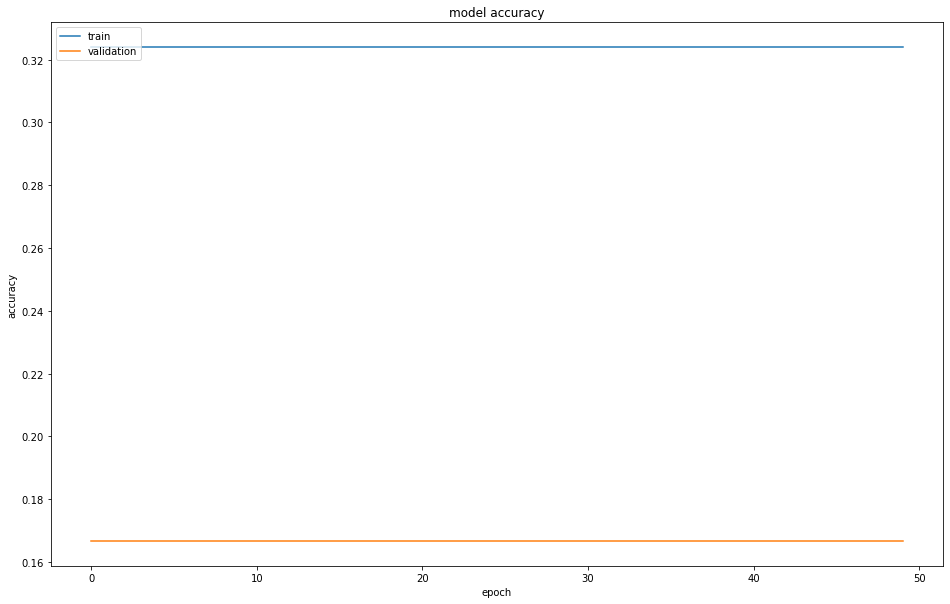

In [41]:
#  "Accuracy Plot"
plt.figure(figsize=(16,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss Plot"
plt.figure(figsize=(16,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# We see a lot of fluctuations in Accuracy Graph which concludes model learning is unstable 

In [42]:
# Check Accuracy

Ytest

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2])

In [43]:
# collect predictions 
predictions = np.round(model.predict(Xtest))
predictions

1/1 [==============================] - 0s 21ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [44]:
#model evaluation,confusion matrix and classification report
from sklearn.metrics import accuracy_score,confusion_matrix ,classification_report
cm=confusion_matrix(Ytest,predictions)
print(cm)
print(accuracy_score(Ytest,predictions))

[[ 0 10  0]
 [ 0 13  0]
 [ 0  7  0]]
0.43333333333333335
